In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt

# Import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# Create an engine to connect to the database.
climate_path = "Resources/hawaii.sqlite"
engine = create_engine(f'sqlite:///{climate_path}')
conn = engine.connect()

In [3]:
# Create the Base class to use for reflection
Base = automap_base()
Base.prepare(engine, reflect=True)

# Show what the tables are
Base.classes.keys()

['measurement', 'station']

In [4]:
# Inspect the database to identify the columns and types.
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for col in columns:
    print(col['name'],col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
# References the tables.
meas = Base.classes.measurement
sta = Base.classes.station

In [6]:
# Creates session
session = Session(bind=engine)

In [7]:
# Session Query
sel = {meas.date, func.avg(meas.prcp)}
prcp_val = session.query(*sel).\
    filter(meas.date > '2016-08-23').\
    group_by(meas.date).\
    order_by(meas.date).all()
prcp_val

[(1.5549999999999997, '2016-08-24'),
 (0.07714285714285715, '2016-08-25'),
 (0.016666666666666666, '2016-08-26'),
 (0.06399999999999999, '2016-08-27'),
 (0.5166666666666666, '2016-08-28'),
 (0.24333333333333332, '2016-08-29'),
 (0.011666666666666667, '2016-08-30'),
 (0.6359999999999999, '2016-08-31'),
 (0.006, '2016-09-01'),
 (0.05, '2016-09-02'),
 (0.254, '2016-09-03'),
 (0.276, '2016-09-04'),
 (0.08499999999999999, '2016-09-05'),
 (0.246, '2016-09-06'),
 (0.3333333333333333, '2016-09-07'),
 (0.07666666666666667, '2016-09-08'),
 (0.17833333333333332, '2016-09-09'),
 (0.27999999999999997, '2016-09-10'),
 (0.25, '2016-09-11'),
 (0.308, '2016-09-12'),
 (0.45166666666666666, '2016-09-13'),
 (2.3800000000000003, '2016-09-14'),
 (0.8266666666666667, '2016-09-15'),
 (0.11714285714285715, '2016-09-16'),
 (0.13599999999999998, '2016-09-17'),
 (0.10600000000000001, '2016-09-18'),
 (0.064, '2016-09-19'),
 (0.14714285714285716, '2016-09-20'),
 (0.19499999999999998, '2016-09-21'),
 (0.205714285714

In [8]:
# Create a dataframe. That has the date as an index.
climate_df = pd.DataFrame(prcp_val, columns=['Precipitation','Date'])
climate_df.set_index('Date', inplace=True)
climate_df = climate_df.sort_values(['Date'])
climate_df

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


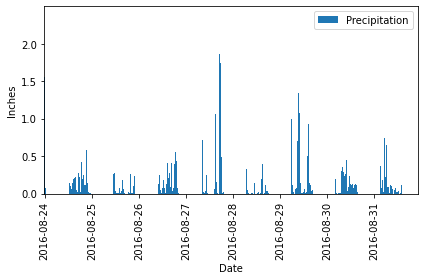

In [9]:
x_axis = np.arange(len(climate_df['Date']))
climate_df.plot.bar()
plt.locator_params(nbins= 8)
plt.ylabel("Inches")
plt.title("Precipitation vs Date")
plt.tight_layout()
plt.show()

In [10]:
climate_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for col in columns:
    print(col['name'],col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
session.query(func.count(sta.station)).all()

[(9)]

In [13]:
sel2 = {sta.station, func.count(meas.station)}
same_station = session.query(*sel2).filter(sta.station == meas.station).\
    group_by(sta.station).\
    order_by(func.count(meas.station).desc()).all()

same_station

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [14]:
sel3 = (meas.date, meas.tobs)
station_tobs = session.query(*sel3).filter(meas.date > '2016-08-23',meas.station == 'USC00519281').\
    group_by(meas.date).\
    order_by(meas.date).all()
station_tobs

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [15]:
tobs_df = pd.DataFrame(station_tobs, columns=['Date','TOBS'])
tobs_df.set_index('Date', inplace=True)
tobs_df = tobs_df.sort_values(['Date'])
tobs_df

,TOBS
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


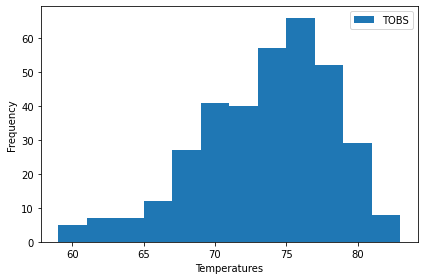

In [16]:
tobs_df.plot.hist(bins = 12)
plt.xlabel('Temperatures')
plt.tight_layout()
plt.show()

In [17]:
sel4 = {func.min(meas.tobs),func.max(meas.tobs),func.avg(meas.tobs)}
session.query(func.min(meas.tobs),func.max(meas.tobs),func.avg(meas.tobs)).filter(meas.date > '2017-05-01').all()

[(66.0, 87.0, 77.31832298136646)]

In [18]:
session.query(func.min(meas.tobs),func.max(meas.tobs),func.avg(meas.tobs)).\
    filter(meas.date > '2017-05-01',meas.date < '2017-06-01').all()

[(66.0, 87.0, 75.26785714285714)]

In [21]:
session.query(meas.tobs,meas.date).\
    filter(meas.date > '2017-05-01',meas.date < '2017-06-01').all()

[(78.0, '2017-05-02'),
 (78.0, '2017-05-03'),
 (78.0, '2017-05-04'),
 (79.0, '2017-05-05'),
 (79.0, '2017-05-06'),
 (79.0, '2017-05-07'),
 (77.0, '2017-05-08'),
 (78.0, '2017-05-10'),
 (78.0, '2017-05-11'),
 (79.0, '2017-05-12'),
 (79.0, '2017-05-13'),
 (77.0, '2017-05-14'),
 (78.0, '2017-05-15'),
 (78.0, '2017-05-16'),
 (78.0, '2017-05-17'),
 (73.0, '2017-05-18'),
 (76.0, '2017-05-19'),
 (78.0, '2017-05-20'),
 (76.0, '2017-05-21'),
 (77.0, '2017-05-22'),
 (87.0, '2017-05-23'),
 (77.0, '2017-05-24'),
 (77.0, '2017-05-25'),
 (74.0, '2017-05-27'),
 (76.0, '2017-05-28'),
 (75.0, '2017-05-29'),
 (76.0, '2017-05-30'),
 (79.0, '2017-05-31'),
 (73.0, '2017-05-02'),
 (74.0, '2017-05-03'),
 (77.0, '2017-05-04'),
 (78.0, '2017-05-05'),
 (75.0, '2017-05-06'),
 (75.0, '2017-05-07'),
 (71.0, '2017-05-08'),
 (74.0, '2017-05-09'),
 (75.0, '2017-05-10'),
 (74.0, '2017-05-11'),
 (74.0, '2017-05-12'),
 (75.0, '2017-05-13'),
 (75.0, '2017-05-14'),
 (75.0, '2017-05-15'),
 (75.0, '2017-05-16'),
 (75.0, '20

In [19]:
# session.query(meas.date).order_by(meas.date.desc()).first()

In [20]:
# session.query(meas.date).\
#     filter(meas.date > '2016-08-23').\
#     order_by(meas.date).all()